# Wild Mushroom Classification

An applied machine learning project to classify whether a wild mushrooms is toxic or safe to eat.

## Objectives

- The dataset is already cleaned, the goal of this project is to create a working model as quickly as possible, identify any issues with it, then fix those issues

## Data Dictionary

- **safe**: 1=safe to eat, 0=poisonous
- **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
- **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
- **bruises**: bruises=t, no=f
- **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
- **gill-attachment**: attached=a, descending=d, free=f, notched=n
- **gill-spacing**: close=c, crowded=w, distant=d
- **gill-size**: broad=b, narrow=n
- **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
- **stalk-shape**: enlarging=e, tapering=t
- **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
- **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
- **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
- **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- **veil-type**: partial=p, universal=u
- **veil-color**: brown=n, orange=o, white=w, yellow=y
- **ring-number**: none=n, one=o, two=t
- **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
- **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
- **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


## Machine Learning Task

- Apply supervised learning classification techniques to determine whether a wild mushroom, based on its attributes, is toxic or safe to eat
- Win condition: not specified

In [47]:
# Module imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import models and metrics
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Import train-test split
from sklearn.model_selection import train_test_split

In [16]:
# Uncomment to load XGBoost if necessary
# import sys
# !{sys.executable} -m pip install xgboost

In [58]:
from xgboost import DMatrix
from xgboost import XGBClassifier

In [3]:
# Import data
df = pd.read_csv('data_vs_wild.csv')

df.head()

,safe,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,f,f,e,f,s,a,c,n,b,e,?,s,k,p,w,p,y,o,e,w,v,l
1,0,x,f,y,f,p,a,c,n,u,e,e,k,k,g,p,p,n,t,l,h,y,w
2,0,b,g,n,t,n,f,c,b,k,e,b,k,y,g,g,p,w,o,f,w,v,m
3,0,k,y,n,f,f,a,c,n,p,t,?,s,s,n,p,p,o,o,e,y,v,m
4,0,x,s,b,f,f,f,c,n,b,t,?,s,k,c,p,p,w,o,f,w,v,l


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
safe                        1000000 non-null int64
cap-shape                   1000000 non-null object
cap-surface                 1000000 non-null object
cap-color                   1000000 non-null object
bruises                     1000000 non-null object
odor                        1000000 non-null object
gill-attachment             1000000 non-null object
gill-spacing                1000000 non-null object
gill-size                   1000000 non-null object
gill-color                  1000000 non-null object
stalk-shape                 1000000 non-null object
stalk-root                  1000000 non-null object
stalk-surface-above-ring    1000000 non-null object
stalk-surface-below-ring    1000000 non-null object
stalk-color-above-ring      1000000 non-null object
stalk-color-below-ring      1000000 non-null object
veil-type                   1000000 non-null object
veil-

In [4]:
df.describe()

,safe
count,1000000.000000
mean,0.004159
std,0.064356
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Note**: the dataset doesn't have any missing values, but does show imbalanced classes within the target variable. Less than 1% of the observations are safe to eat. It will be important to stratify the train and test split on the `safe` column and try training models on both up-scaled positive class (safe) observations and down-scaled negative class (poisonous) observations. Also, `accuracy` won't be an appropriate scoring metric to evaluate models given the imbalanced class situation.

In [5]:
df.describe(include='object')

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,f,f,c,n,b,t,b,k,k,w,w,p,w,o,e,w,v,d
freq,301106,346351,180545,668946,330047,747593,735686,533439,261334,506740,337137,408020,398845,274117,270045,1000000,623665,652742,325713,286068,445866,233038


In [6]:
for col in df.dtypes[df.dtypes == 'object'].index:
    print(col)
    print(df[col].value_counts())

cap-shape
x    301106
f    282010
k    160089
b     89614
c     83612
s     83569
Name: cap-shape, dtype: int64
cap-surface
y    346351
s    305600
f    222035
g    126014
Name: cap-surface, dtype: int64
cap-color
n    180545
e    162110
g    153308
y    135245
w     90814
b     65065
p     61033
c     51554
r     50249
u     50077
Name: cap-color, dtype: int64
bruises
f    668946
t    331054
Name: bruises, dtype: int64
odor
f    330047
s    128930
y    128596
p     88014
c     79966
n     72511
m     60347
a     55873
l     55716
Name: odor, dtype: int64
gill-attachment
f    747593
a    252407
Name: gill-attachment, dtype: int64
gill-spacing
c    735686
w    264314
Name: gill-spacing, dtype: int64
gill-size
n    533439
b    466561
Name: gill-size, dtype: int64
gill-color
b    261334
p    123505
h    109122
g    105966
w     73393
n     56283
k     49704
u     47886
r     44840
y     44468
o     41821
e     41678
Name: gill-color, dtype: int64
stalk-shape
t    506740
e    493260
Name: 

Data observations:

- `veil-type` column has zero variance and doesn't add any information, all observations are the same value (drop column)
- `ring-number` values are ordinal, should convert to numbers 0, 1, 2
- `bruises` is an indicator variable, should convert to 0, 1
- `stalk-root` uses "?" to indicate missing values, but not necessary to change (would just change it to another character)

In [7]:
# Drop veil-type column as all values are same
df.drop('veil-type', axis=1, inplace=True)

In [8]:
# Convert ring-number to ordinal number values
def ring_to_num(val):
    # Converts n (none) to 0, o (one) to 1, t (two) to 2
    if val == 'n':
        return 0
    elif val == 'o':
        return 1
    elif val == 't':
        return 2
    else:
        return np.nan

df['ring-number'] = df['ring-number'].apply(ring_to_num)

In [9]:
# Convert bruises column to indicator variable
df['bruises'] = (df['bruises'] == 't').astype(int)

In [10]:
df.head()

,safe,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,f,f,e,0,s,a,c,n,b,e,?,s,k,p,w,y,1,e,w,v,l
1,0,x,f,y,0,p,a,c,n,u,e,e,k,k,g,p,n,2,l,h,y,w
2,0,b,g,n,1,n,f,c,b,k,e,b,k,y,g,g,w,1,f,w,v,m
3,0,k,y,n,0,f,a,c,n,p,t,?,s,s,n,p,o,1,e,y,v,m
4,0,x,s,b,0,f,f,c,n,b,t,?,s,k,c,p,w,1,f,w,v,l


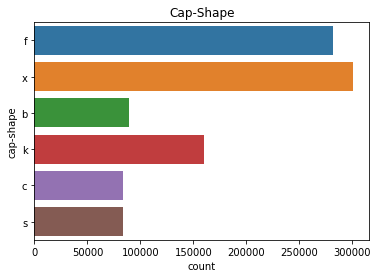

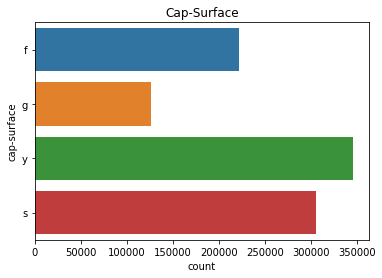

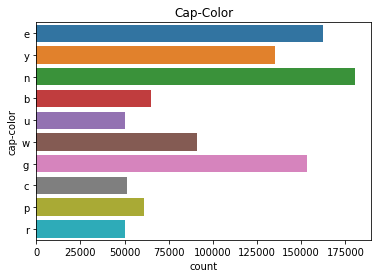

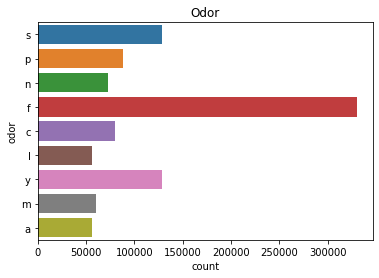

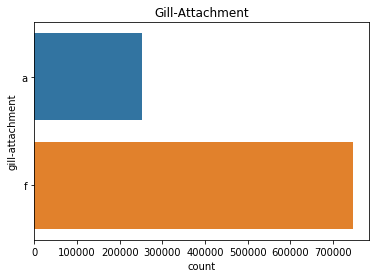

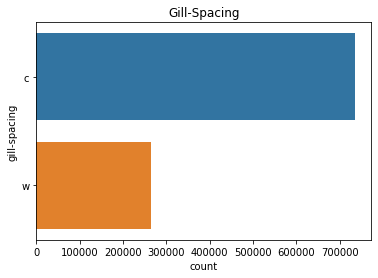

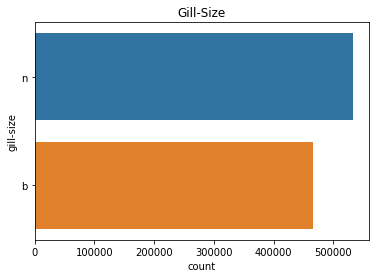

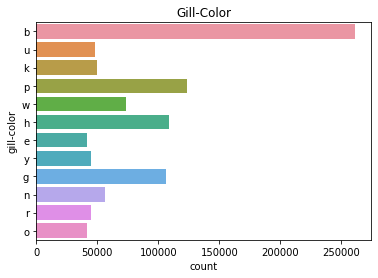

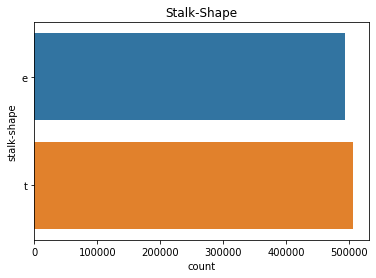

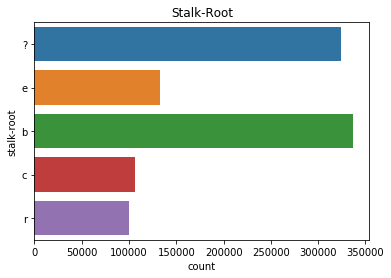

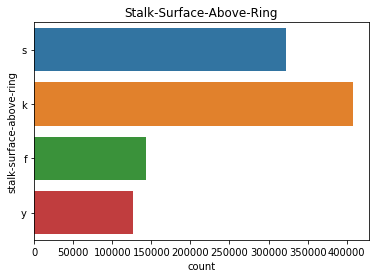

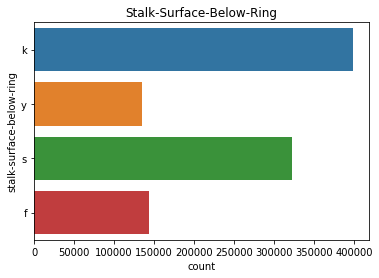

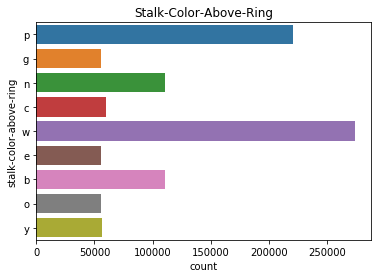

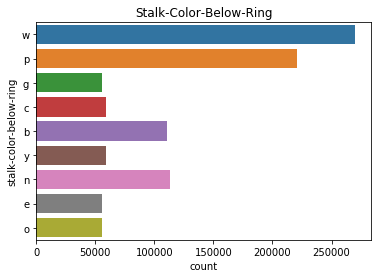

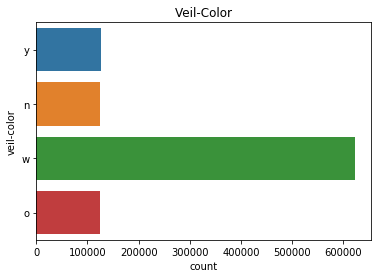

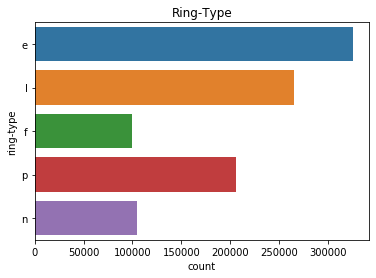

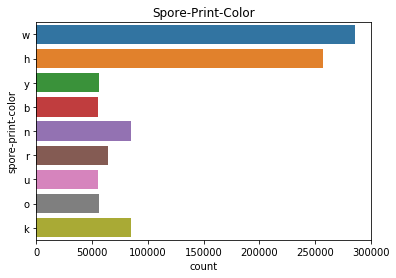

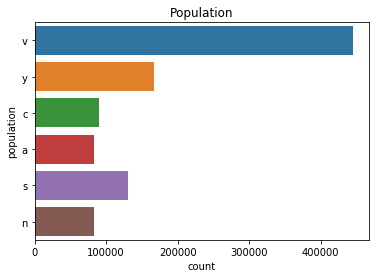

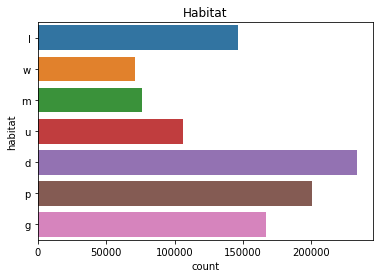

In [11]:
# Create count plots for categorical variables
for col in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(data=df, y=col)
    plt.title(col.title())
    plt.show()

No sparse columns for the remaining features

In [12]:
# Create analytical base table
cols = df.dtypes[df.dtypes == 'object'].index
abt = pd.get_dummies(df, columns=cols)

abt.head()

,safe,bruises,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [60]:
# Create train and test splits of data

X = abt.drop('safe', axis=1)
y = abt['safe']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800000, 113) (200000, 113) (800000,) (200000,)


The large number of observations requires substantial computing power to train and tune a model. This is especially the case when using a non-GPU personal laptop, so for efficiency's sake, training is done on only one baseline model.

In [55]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_pred_probs = xgb.predict_proba(X_test)
xgb_pred_probs = [p[1] for p in xgb_pred_probs]

In [56]:
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print('Baseline XGB Precision: {0:.4f}'.format(precision_score(y_test, xgb_pred)))
print('Baseline XGB Recall: {0:.4f}'.format(recall_score(y_test, xgb_pred)))
print('Baseline XGB F1 Score: {0:.4f}'.format(f1_score(y_test, xgb_pred)))
print('Baseline XGB AUROC Score: {0:.4f}'.format(roc_auc_score(y_test, xgb_pred_probs)))

[[199165      3]
 [   805     27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199168
           1       0.90      0.03      0.06       832

    accuracy                           1.00    200000
   macro avg       0.95      0.52      0.53    200000
weighted avg       1.00      1.00      0.99    200000

Baseline XGB Precision: 0.9000
Baseline XGB Recall: 0.0325
Baseline XGB F1 Score: 0.0626
Baseline XGB AUROC Score: 0.9383


The performance of the baseline model has very low recall and f1-scores for the positive class due to the imbalanced nature of the dataset on the target variable. To address the issue, a resampling technique will try both upsampling the positive class and downsampling the negative class, based off the current training data.

In [43]:
# Re-combine training data to split by safe/poisonous
X_all_train = X_train.copy()
X_all_train['safe'] = y_train
print(X_all_train.shape)

poison = X_all_train[X_all_train['safe'] == 0]  # length 796673
safe = X_all_train[X_all_train['safe'] == 1]  # length 3327

(800000, 114)


In [42]:
# Upsample safe mushrooms
safe_upsamp = resample(safe, replace=True,
                       n_samples=len(poison),
                       random_state=42)

upsampled = pd.concat([poison, safe_upsamp])
print(upsampled.shape)

X_up_train = upsampled.drop('safe', axis=1)
y_up_train = upsampled['safe']

print(X_up_train.shape, y_up_train.shape)

(1593346, 114)
(1593346, 113) (1593346,)


In [61]:
# Check model performance with upsampled data
xgb_upsamp = XGBClassifier(random_state=42)
xgb_upsamp.fit(X_up_train, y_up_train)

xgb_up_pred = xgb_upsamp.predict(X_test)
xgb_up_pred_probs = xgb_upsamp.predict_proba(X_test)
xgb_up_pred_probs = [p[1] for p in xgb_up_pred_probs]

In [68]:
print(confusion_matrix(y_test, xgb_up_pred))
print(classification_report(y_test, xgb_up_pred))
print('Upsampled XGB Precision: {0:.4f}'.format(precision_score(y_test, xgb_up_pred)))
print('Upsampled XGB Recall: {0:.4f}'.format(recall_score(y_test, xgb_up_pred)))
print('Upsampled XGB F1 Score: {0:.4f}'.format(f1_score(y_test, xgb_up_pred)))
print('Upsampled XGB AUROC: {0:.4f}'.format(roc_auc_score(y_test, xgb_up_pred_probs)))

[[172847  26321]
 [   101    731]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    199168
           1       0.03      0.88      0.05       832

    accuracy                           0.87    200000
   macro avg       0.51      0.87      0.49    200000
weighted avg       1.00      0.87      0.93    200000

Upsampled XGB Precision: 0.0270
Upsampled XGB Recall: 0.8786
Upsampled XGB F1 Score: 0.0524
Upsampled XGB AUROC: 0.9449


In [45]:
# Downsample poisonous mushrooms
pois_down = resample(poison, replace=True,
                     n_samples=len(safe),
                     random_state=42)

downsampled = pd.concat([safe, pois_down])
print(downsampled.shape)

X_down_train = downsampled.drop('safe', axis=1)
y_down_train = downsampled['safe']

print(X_down_train.shape, y_down_train.shape)

(6654, 114)
(6654, 113) (6654,)


In [51]:
# Check model performance with downsampled data
xgb_down = XGBClassifier(random_state=42)
xgb_down.fit(X_down_train, y_down_train)

xgb_down_pred = xgb_down.predict(X_test)
xgb_down_pred_probs = xgb_down.predict_proba(X_test)
xgb_down_pred_probs = [p[1] for p in xgb_down_pred_probs]

In [64]:
print(confusion_matrix(y_test, xgb_down_pred))
print(classification_report(y_test, xgb_down_pred))
print('Downsampled XGB Precision: {0:.4f}'.format(precision_score(y_test, xgb_down_pred)))
print('Downsampled XGB Recall: {0:.4f}'.format(recall_score(y_test, xgb_down_pred)))
print('Downsampled XGB F1 Score: {0:.4f}'.format(f1_score(y_test, xgb_down_pred)))
print('Downsampled XGB AUROC: {0:.4f}'.format(roc_auc_score(y_test, xgb_down_pred_probs)))

[[171166  28002]
 [    97    735]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    199168
           1       0.03      0.88      0.05       832

    accuracy                           0.86    200000
   macro avg       0.51      0.87      0.49    200000
weighted avg       1.00      0.86      0.92    200000

Downsampled XGB Precision: 0.0256
Downsampled XGB Recall: 0.8834
Downsampled XGB F1 Score: 0.0497
Downsampled XGB AUROC: 0.9425


## Conclusion

After applying upsampling and downsampling techniques on the training set to balance the target classes, there was a positive impact on the models' recall (3% to 88%) and a slight bump to AUROC (may not be statistically significant). However, the resampled F1 scores were slightly worse, mainly because the precision score declined dramatically. The resampled models predicted a lot more false positives after training on a balanced-class dataset, and therefore offset any benefits from the recall improvement.

Since there was no specific win condition for this exercise, there isn't a clear metric to focus on. The AUROC scores were similar, and visualizing each model's ROC curve doesn't show much separation at different thresholds. If you're looking for food in the woods and you can't tolerate any level of poison, then a high precision rate is key. The baseline model wins here - while it won't classify much as safe to eat, it'll be correct 90% of the time when it does. If you could tolerate some level of poison, or were under pressure trying to collect a lot of safe samples, then either of the resampled models with higher recall would be better.

In [71]:
# Baseline model
fpr, tpr, thresh = roc_curve(y_test, xgb_pred_probs)

# Upsampled safe mushrooms
fpr_up, tpr_up, thresh_up = roc_curve(y_test, xgb_up_pred_probs)

# Downsampled poisonous mushrooms
fpr_dn, tpr_dn, thres_dn = roc_curve(y_test, xgb_down_pred_probs)

Text(0, 0.5, 'True Positive Rate')

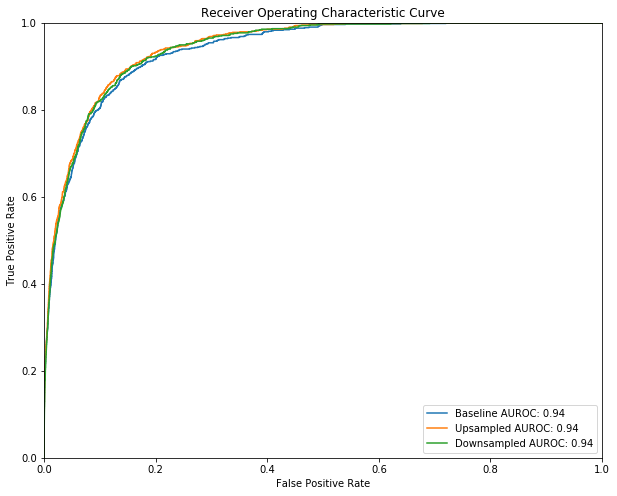

In [72]:
# Plot the ROC Curves

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(fpr, tpr, label='Baseline AUROC: {0:.2f}'
         .format(roc_auc_score(y_test, xgb_pred_probs)))
plt.plot(fpr_up, tpr_up, label='Upsampled AUROC: {0:.2f}'
         .format(roc_auc_score(y_test, xgb_up_pred_probs)))
plt.plot(fpr_dn, tpr_dn, label='Downsampled AUROC: {0:.2f}'
         .format(roc_auc_score(y_test, xgb_down_pred_probs)))

plt.legend(loc='lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')